In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA


## Load the CSV file into a DataFrame

In [2]:
file_path = 'C:\\Users\\gezeg\\OneDrive\\PHDS\\Interniship\\Dataset\\Weather-compiled.csv'

weather_data = pd.read_csv(file_path)

## Replace invalid values ('-') with NaN

In [3]:
weather_data_cleaned = weather_data.replace('-', pd.NA)

## Convert 'Date' column to proper datetime format

In [4]:
weather_data_cleaned['Date'] = pd.to_datetime(weather_data_cleaned['Date'], format='%d-%b-%y', errors='coerce')

## Convert all other columns to numeric where applicable

In [5]:
numeric_columns = weather_data_cleaned.columns.drop('Date')
weather_data_cleaned[numeric_columns] = weather_data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

## Handle missing values - Filling missing values with the mean of each column


In [6]:
weather_data_cleaned.fillna(weather_data_cleaned.mean(), inplace=True)

In [7]:
weather_data_cleaned.describe()

,Date,Soil temperature at 0.05 depth in mts,Soil temperature at 0.1 depth in mts,Soil temperature at 0.20cm depth in mts,Soil temperature at 0.50cm depth in mts,Soil temperature at 1.00cm depth in mts,max air temperature at 1.5mts,min air temperature at 1.5mts,max relative humidity\n at 1.5mts,min Relative humidity\n at 1.5mts,Pitche Evaporation,Pan Evaporation,Wind Speed km/h at day,Wind Speed km/h at night,Wind Speed Avarage(m/s),sunshine hour,Rainfall
count,4276,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000,4276.000000
mean,2018-05-13 22:50:17.399438592,33.252479,30.984133,17.709381,9.635588,13.294861,45.592181,27.186161,71.514142,36.887752,2.614272,5.021125,1.541362,1.292473,1.209055,0.479102,2.675271
min,2012-06-23 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-05-29 18:00:00,30.440000,29.790000,0.000000,0.000000,0.000000,34.400000,20.800000,66.000000,25.000000,0.000000,1.460000,0.900000,0.340000,1.165000,0.416667,0.000000
50%,2018-05-22 12:00:00,32.560000,31.000000,28.920000,0.000000,0.000000,36.400000,23.000000,91.000000,39.000000,2.000000,5.021125,1.170000,0.650000,1.209055,0.479102,2.675271
75%,2021-04-27 06:00:00,36.000000,32.200000,31.360000,28.600000,30.240000,40.200000,28.200000,96.000000,51.000000,4.325000,7.440000,1.560000,1.060000,1.209055,0.479102,2.675271
max,2024-03-31 00:00:00,121.400000,55.090000,93.360000,45.200000,89.800000,96.000000,85.000000,97.000000,96.000000,14.200000,63.900000,69.000000,64.200000,5.375000,10.400000,73.300000
std,NaN,4.323764,2.298573,15.412277,16.004241,14.080007,21.048095,10.938215,34.088231,20.027462,2.642966,3.731912,2.170335,3.020553,0.318557,0.784113,5.161748


## Exploratory Data Analysis (EDA)

### Outlier Detection and Handling using Z-Score Method
#### Calculate the z-scores

In [8]:
z_scores = np.abs(stats.zscore(weather_data_cleaned[numeric_columns]))

#### Set a threshold to identify outliers


In [9]:
outlier_threshold = 3
outliers = (z_scores > outlier_threshold).any(axis=1)

#### Remove rows with outliers


In [10]:
weather_data_cleaned = weather_data_cleaned[~outliers]


###  Rolling Average Analysis
#### Set 'Date' as index for time series operations

In [11]:
weather_data_cleaned.set_index('Date', inplace=True)

#### Calculate 30-day rolling averages for temperature and rainfall


In [12]:
weather_data_cleaned['Max Air Temp Rolling Avg'] = weather_data_cleaned['max air temperature at 1.5mts'].rolling(window=30).mean()
weather_data_cleaned['Min Air Temp Rolling Avg'] = weather_data_cleaned['min air temperature at 1.5mts'].rolling(window=30).mean()
weather_data_cleaned['Rainfall Rolling Avg'] = weather_data_cleaned['Rainfall'].rolling(window=30).mean()

#### Plot rolling averages


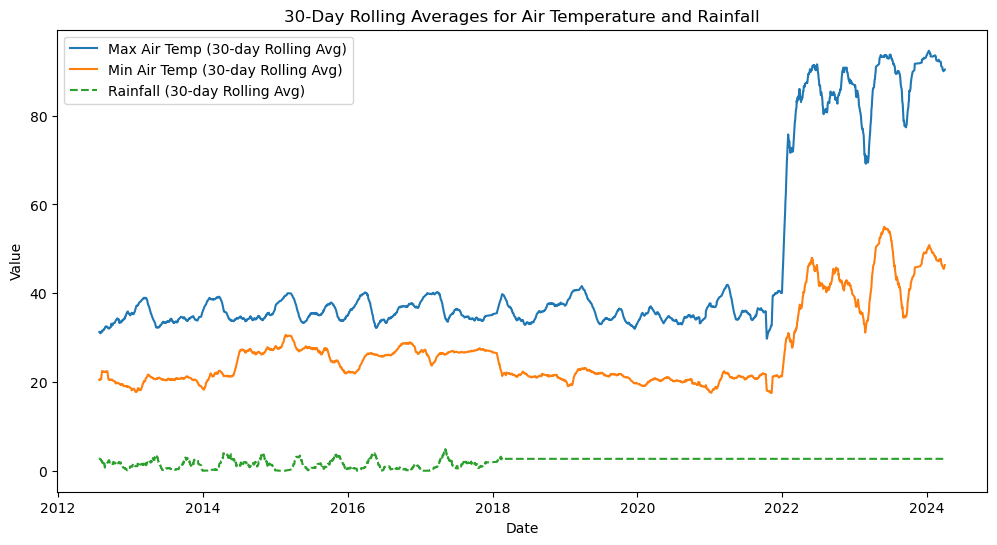

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(weather_data_cleaned.index, weather_data_cleaned['Max Air Temp Rolling Avg'], label='Max Air Temp (30-day Rolling Avg)')
plt.plot(weather_data_cleaned.index, weather_data_cleaned['Min Air Temp Rolling Avg'], label='Min Air Temp (30-day Rolling Avg)')
plt.plot(weather_data_cleaned.index, weather_data_cleaned['Rainfall Rolling Avg'], label='Rainfall (30-day Rolling Avg)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('30-Day Rolling Averages for Air Temperature and Rainfall')
plt.legend()
plt.show()


### Time Series Decomposition - Decomposing Max Air Temperature
#### Decompose the time series into trend, seasonal, and residual components

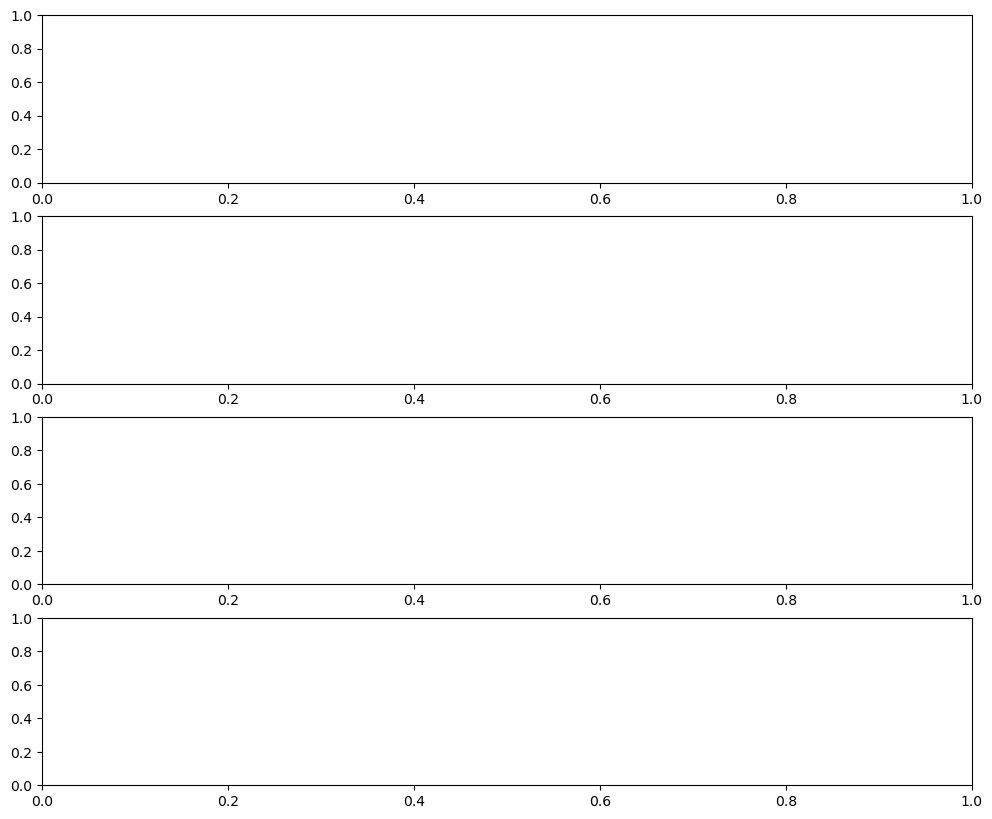

In [14]:
decomposition = seasonal_decompose(weather_data_cleaned['max air temperature at 1.5mts'], model='additive', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

#### Plot the decomposed components

In [15]:
ax1.plot(decomposition.observed, label='Observed')
ax1.set_title('Observed')
ax2.plot(decomposition.trend, label='Trend', color='orange')
ax2.set_title('Trend')
ax3.plot(decomposition.seasonal, label='Seasonal', color='green')
ax3.set_title('Seasonal')
ax4.plot(decomposition.resid, label='Residual', color='red')
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

### Advanced Time Series Analysis - Forecasting using ARIMA Model
#### For ARIMA, we'll use the 'max air temperature at 1.5mts' column

#### Split the data into training and testing sets

In [16]:
train_size = int(len(weather_data_cleaned) * 0.8)  # 80% for training
train_data, test_data = weather_data_cleaned['max air temperature at 1.5mts'][:train_size], weather_data_cleaned['max air temperature at 1.5mts'][train_size:]


#### Build and Train the ARIMA Model
#### Choosing ARIMA parameters (p, d, q) based on previous analysis or ACF/PACF plots

In [17]:
model = ARIMA(train_data, order=(5, 1, 0))  # Order can be adjusted based on data characteristics
model_fit = model.fit()

C:\Users\gezeg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gezeg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\gezeg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#### Forecasting

In [18]:
forecast = model_fit.forecast(steps=len(test_data))  # Forecast for the test data duration

C:\Users\gezeg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\gezeg\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#### Plot the Forecast vs Actual Values


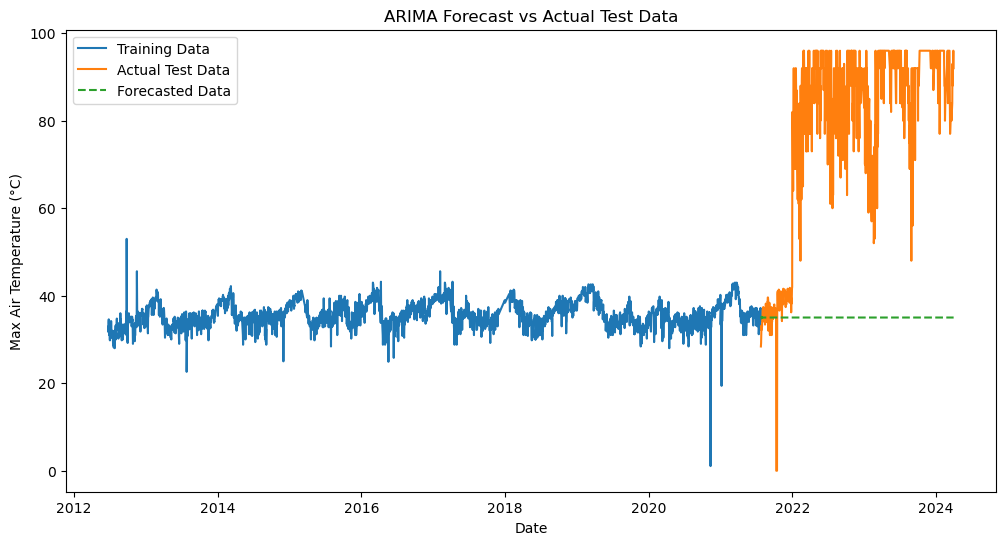

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Test Data')
plt.plot(test_data.index, forecast, label='Forecasted Data', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Max Air Temperature (°C)')
plt.title('ARIMA Forecast vs Actual Test Data')
plt.legend()
plt.show()

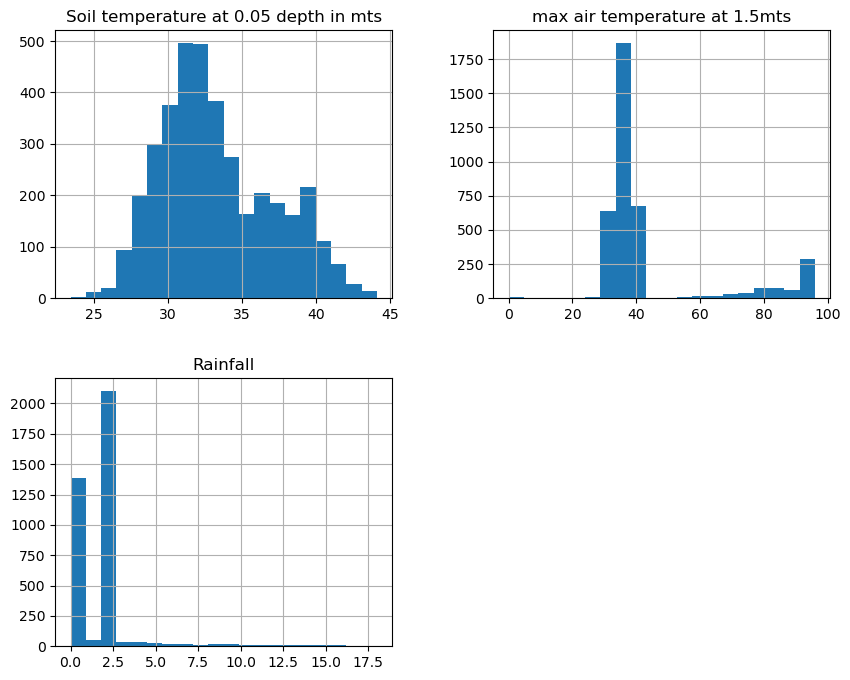

In [20]:
# Plot histograms of some relevant columns
weather_data_cleaned[['Soil temperature at 0.05 depth in mts', 'max air temperature at 1.5mts', 'Rainfall']].hist(bins=20, figsize=(10, 8))
plt.show()

#### Visualize the Temperature Trends


#### Correlation Matrix Heatmap

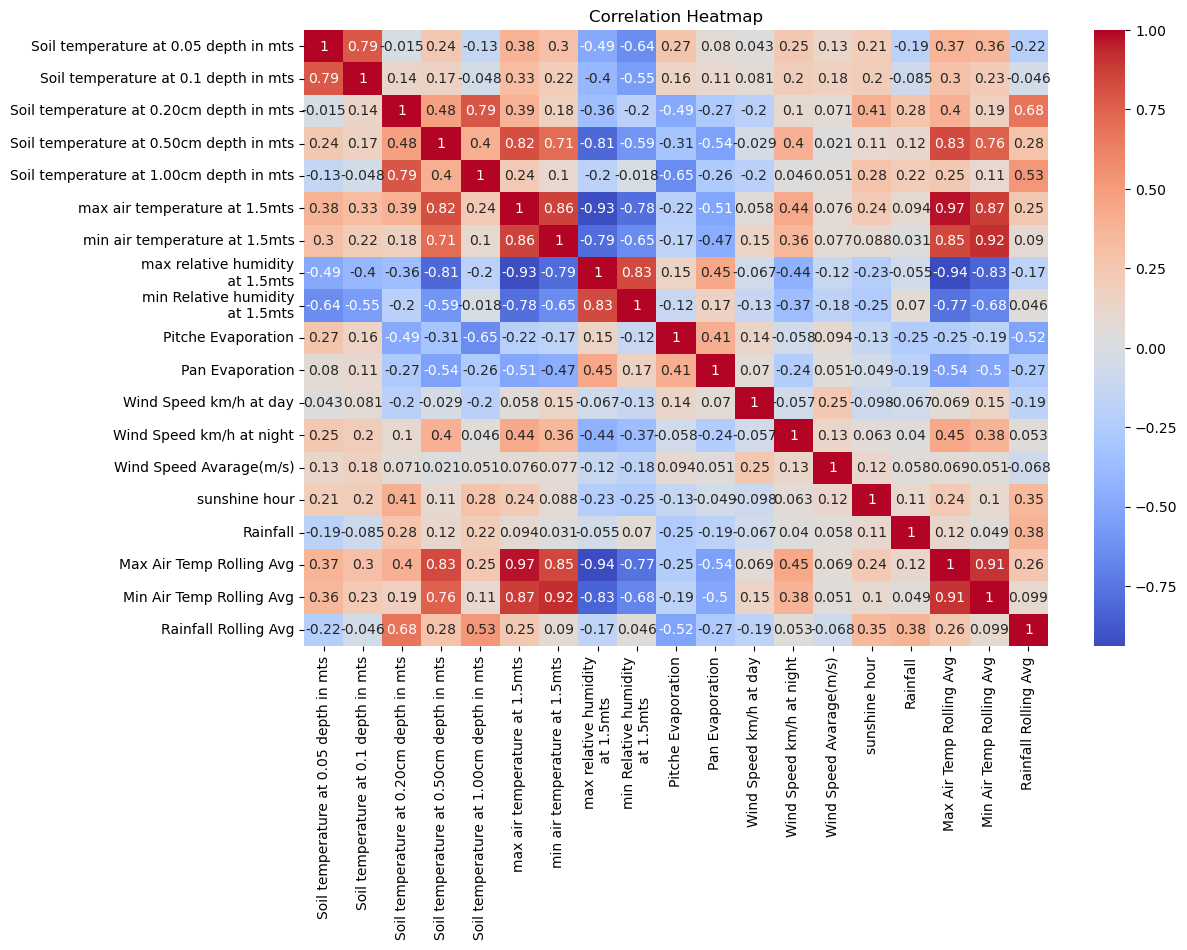

In [21]:
plt.figure(figsize=(12, 8))
correlation_matrix = weather_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Save the cleaned data to a new CSV file


In [22]:
cleaned_file_path = 'Weather-compiled-cleaned.csv'
weather_data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data cleaning, EDA, outlier handling, and time series analysis completed. Cleaned data saved to {cleaned_file_path}.")



Data cleaning, EDA, outlier handling, and time series analysis completed. Cleaned data saved to Weather-compiled-cleaned.csv.
